In [ ]:
from layout import get_layout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from genetic_algo_preparation import Floorplanning, RecordBsfCosts

In [2]:
df = pd.read_csv('../refined_drug_data.csv', sep=';')
# all NaN to empty string
df = df.fillna('')

data = df.copy()
# make an array
data['drug_names'] = data[['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8']].values.tolist()
# remove empty strings
data['drug_names'] = data['drug_names'].apply(lambda x: [i for i in x if i])
data = data.drop(['Drug_1', 'Drug_2', 'Drug_3', 'Drug_4', 'Drug_5', 'Drug_6', 'Drug_7', 'Drug_8'], axis=1)
data

print('Total number of combinations:', len(data))
print('Number of unique drugs:', len(data['drug_names'].explode().unique()))

# sort by freq 
sorted_drug_names = data['drug_names'].explode().value_counts().index
print('Sorted medications by frequency:', sorted_drug_names)
print('Frequency of each medication:', data['drug_names'].explode().value_counts().to_list())

Total number of combinations: 912
Number of unique drugs: 40
Sorted medications by frequency: Index(['LISINOPRIL', 'SIMVASTATIN', 'METOPROLOL', 'METFORMIN', 'LEVOTHYROXINE',
       'AMLODIPINE', 'HYDROCHLOROTHIAZIDE', 'FUROSEMIDE', 'ATORVASTATIN',
       'OMEPRAZOLE', 'ATENOLOL', 'GLIPIZIDE', 'ALBUTEROL', 'WARFARIN',
       'ASPIRIN', 'POTASSIUM CHLORIDE', 'ESOMEPRAZOLE', 'CLOPIDOGREL',
       'CARVEDILOL', 'VALSARTAN', 'LOSARTAN', 'GABAPENTIN', 'ROSUVASTATIN',
       'LOVASTATIN', 'PIOGLITAZONE', 'PRAVASTATIN', 'RANITIDINE', 'TRAMADOL',
       'IBUPROFEN', 'INSULIN GLARGINE', 'CITALOPRAM', 'ALENDRONATE',
       'ALLOPURINOL', 'MONTELUKAST', 'FEXOFENADINE', 'TAMSULOSIN', 'ZOLPIDEM',
       'SERTRALINE', 'FLUTICASONE NASAL', 'PREDNISONE'],
      dtype='object', name='drug_names')
Frequency of each medication: [294, 270, 223, 215, 170, 159, 157, 133, 133, 127, 123, 98, 82, 81, 75, 72, 65, 65, 63, 62, 55, 54, 54, 52, 50, 48, 48, 46, 43, 42, 42, 42, 39, 34, 33, 32, 32, 32, 29, 28]


In [3]:
layout = 'singleline_2_enter_50'

amount_of_machines = 50
INLETS_NUM = 2

# generated distribution from 14_05_2024.ipynb file
machines_count = [4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # 50 machines
# machines_count = [14, 11, 9, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # 80 machines
# machines_count = [5, 5, 5, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
assert sum(machines_count) == amount_of_machines, f"Sum of machines count is not equal to amount of machines: {sum(machines_count)} != {amount_of_machines}"

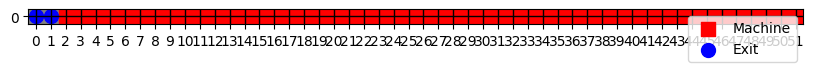

In [4]:
coord_x, coord_y, restricted_area, all_posible_positions = get_layout(layout)


exit_positions = all_posible_positions[:INLETS_NUM]
machine_positions = all_posible_positions[INLETS_NUM:]

assert len(machine_positions) == amount_of_machines, f"Amount of machines is not equal to amount of machines: {len(machine_positions)} != {amount_of_machines}"

plt.figure(figsize=(10, 10))
plt.imshow(restricted_area.transpose(), cmap='gray', alpha=0.5)
plt.scatter(*zip(*machine_positions), c='r', s=100, marker='s', label='Machine')
plt.scatter(*zip(*exit_positions), c='b', s=100, marker='o', label='Exit')
plt.xticks(range(coord_x))
plt.yticks(range(coord_y))

plt.legend()

plt.grid(which='major', color='k', linestyle='-', linewidth=1)
plt.show()

In [5]:
# read csv
coocurrence_matrix = np.loadtxt('../normalized_coocurrence_matrix.csv', delimiter=',')

In [6]:
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [7]:
# Prepare problem
# drug_names = data['drug_names'].explode().value_counts().index

# All distances between all possible positions. (distances[i, j] = distance between i-th and j-th position)
num_of_positions = len(all_posible_positions)
if layout.startswith('kolecko'):
    print('Calculating distances for the ring as a minimum distnace around the ring')
    distances = np.zeros((num_of_positions, num_of_positions))
    for i in range(num_of_positions):
        for j in range(num_of_positions):
            if i == j:
                distances[i, j] = 0
            # protejsi pozice - x_i = 0 and x_j = coord_x - 1
            elif all_posible_positions[i][0] == 0 and all_posible_positions[j][0] == coord_x - 1 and (all_posible_positions[i][1] not in [0, coord_y - 1] and all_posible_positions[j][1] not in [0, coord_y - 1]):
                # print(i, j, all_posible_positions[i], all_posible_positions[j])
                corner_i_1 = (all_posible_positions[i][0], 0)
                # manhattan distance from all_posible_positions[i][0] to corner_i_1 + manhattan distance from all_posible_positions[j][0] to corner_i_1
                dist_1 = manhattan_distance(all_posible_positions[i], corner_i_1) + manhattan_distance(corner_i_1, all_posible_positions[j])
                corner_i_2 = (all_posible_positions[i][0], coord_y - 1)
                dist_2 = manhattan_distance(all_posible_positions[i], corner_i_2) + manhattan_distance(corner_i_2, all_posible_positions[j])
                distances[i, j] = min(dist_1, dist_2)
            # protejsi pozice - y
            elif all_posible_positions[i][1] == 0 and all_posible_positions[j][1] == coord_y - 1 and (all_posible_positions[i][0] not in [0, coord_x - 1] and all_posible_positions[j][0] not in [0, coord_x - 1]):
                # print(i, j, all_posible_positions[i], all_posible_positions[j])
                corner_i_1 = (0, all_posible_positions[i][1])
                dist_1 = manhattan_distance(all_posible_positions[i], corner_i_1) + manhattan_distance(corner_i_1, all_posible_positions[j])
                corner_i_2 = (coord_x - 1, all_posible_positions[i][1])
                dist_2 = manhattan_distance(all_posible_positions[i], corner_i_2) + manhattan_distance(corner_i_2, all_posible_positions[j])
                distances[i, j] = min(dist_1, dist_2)
            else: 
                distances[i, j] = manhattan_distance(all_posible_positions[i], all_posible_positions[j])
else:
    print('Calculating distances using Manhattan distance')
    distances = np.zeros((num_of_positions, num_of_positions))
    for i in range(num_of_positions):
        for j in range(num_of_positions):
            distances[i, j] = np.abs(all_posible_positions[i][0] - all_posible_positions[j][0]) + np.abs(all_posible_positions[i][1] - all_posible_positions[j][1])

# Create array of recepts where each drug is index in drug_names
capsules = []
for i in range(len(data)):
    capsules.append([sorted_drug_names.to_list().index(drug) for drug in data['drug_names'][i]])

# Make np array (for that make the same size recepts (place 0))
max_len = max([len(capsule) for capsule in capsules])
for i in range(len(capsules)):
    capsules[i] = capsules[i] + [-1] * (max_len - len(capsules[i]))
np_capsules = np.array(capsules)

Calculating distances using Manhattan distance


In [8]:
# perm = range(40)

# Create a chromosome. Counts of machines in sorted_drug_names are given by machines_count. Create an array of machines (machines_count times each drug)
chromosome = np.array([drug for drug, count in zip(sorted_drug_names, machines_count) for _ in range(count)])
chromosome = np.array([sorted_drug_names.to_list().index(drug) for drug in chromosome])

# Add exit positions to machines_chromosome
chromosome = np.concatenate((chromosome, np.array([-10] * INLETS_NUM)))
chromosome

array([  0,   0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   4,
         4,   5,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39, -10, -10])

#### Run Genetic Algorithm

In [9]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination import get_termination
from pymoo.optimize import minimize

In [1]:
population_size = 50

perm = range(len(chromosome))
perm_machines = range(amount_of_machines)
perm_inlets = list(set(range(amount_of_machines + INLETS_NUM)) - set(perm_machines))
init_population = np.zeros((population_size, len(chromosome)))
for i in range(population_size):
    # Just random: init_population[i] = np.random.permutation(perm)
    # init_population[i] = np.random.permutation(perm)

    # Not random outlets
    random_permutation_machines = np.random.permutation(perm_machines)
    area = int((amount_of_machines) / INLETS_NUM)
    init_population_i = []
    for j in range(INLETS_NUM):
        init_population_i = np.concatenate((init_population_i, random_permutation_machines[j*area:(j+1)*area].tolist() + [perm_inlets[j]]))        
    init_population_i = np.concatenate((init_population_i, random_permutation_machines[(j+1)*area:]))
    init_population[i] = init_population_i

init_population[-1] = np.random.permutation(perm)

problem = Floorplanning(perm, chromosome, np_capsules, distances, layout, coocurrence_matrix)

NameError: name 'chromosome' is not defined

In [11]:
algorithm = GA(
    pop_size=population_size, 
    eliminate_duplicates=True, 
    sampling=init_population, # final_population or init_population
    crossover=OrderCrossover(), 
    mutation=InversionMutation(), 
    # termination=get_termination("n_gen", 50)
)
n_eval = 10000 # 25000 / 50 = 500 generations
print(f'Number of evaluations: {n_eval}, generations: {n_eval/population_size}')
termination = get_termination("n_eval", n_eval) 
res = minimize(
    problem,
    algorithm,
    termination,
    save_history=True,
    callback=RecordBsfCosts(),
    # seed=1,
)
# unique datetime for saving
import datetime
now = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
print("date: ", now)

Number of evaluations: 10000, generations: 200.0
Generation: 100 | Best cost: 3047.624959000636
Generation: 200 | Best cost: 2979.545681771579
date:  20240924223740


In [12]:
print('Cost (through all recepts): ', res.F)
print('Permutation: ', res.X)
print('Number of iterations (for population, not candidate): ', res.history.__len__())

Cost (through all recepts):  [2979.54568177]
Permutation:  [ 0. 51. 23. 17. 18.  8.  4.  3. 10. 20. 16. 13. 15. 19. 29. 26. 35. 28.
 21. 34. 24. 27. 41. 31. 25. 45. 30. 32. 37. 49. 46. 44. 39. 48. 38. 43.
 50.  5.  6. 42. 33. 36.  9. 12.  2. 11. 22. 40. 47. 14.  1.  7.]
Number of iterations (for population, not candidate):  200


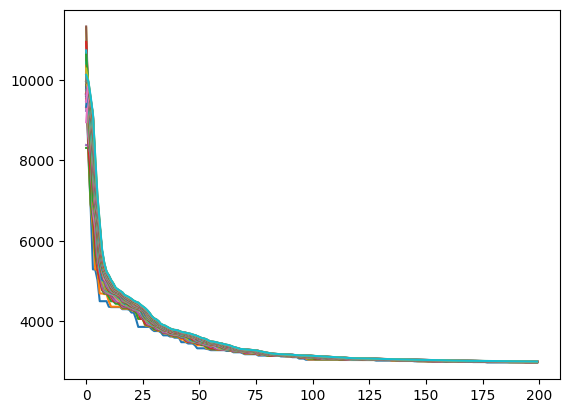

In [13]:
# plot best so far costs line ([i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']])
plt.figure()
# plt.plot([i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']]) min 
plt.plot([i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']])
plt.show()

In [42]:
# np.savez(f'../results/{layout}_{n_eval}_popsize_{population_size}_order_inversion_{now}.npz', 
#     layout=layout, 
#     population_size=population_size, 
#     inlet_positions=exit_positions,

#     machine_positions=machine_positions,
#     machines_drug_names=np.array([sorted_drug_names[drug] for drug in chromosome]),

#     gen_best_cost=res.F, 
#     gen_best_perm=res.X, # permutation of idxs of machines_drug_names
#     n_eval=n_eval,
#     bsf_costs=[i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']],
#     gen_description= f'Number of evaluations: {n_eval}, generations: {n_eval/population_size}, operator: OrderCrossover, InversionMutation',
# )
# now

'20240827171221'

In [14]:
res.algorithm.callback.data['bsf_solution'][0].__len__()

50

In [15]:
idx_of_outlets = np.where(chromosome[res.X.astype(int)] == -10)[0]
inlet_positions = np.array(all_posible_positions)[idx_of_outlets]
inlet_positions_as_tuples = [tuple(i) for i in inlet_positions]
machines_idxs = [pos for pos in all_posible_positions if pos not in inlet_positions_as_tuples]

np.savez(f'../results/{layout}_{n_eval}_popsize_{population_size}_order_inversion_{now}.npz', 
    layout=layout, 
    population_size=population_size, 
    chromosome=chromosome,
    all_posible_positions=all_posible_positions,
    inlet_positions=np.array(all_posible_positions)[idx_of_outlets],
    machine_positions=[pos for pos in all_posible_positions if pos not in inlet_positions_as_tuples],
    machines_drug_names=np.array([sorted_drug_names[drug] for drug in chromosome if drug != -10]), # remove -10 (inlet) from chromosome

    gen_best_cost=res.F,
    gen_best_perm=res.X[res.X < amount_of_machines], # < amount_of_machines because others are inlets
    best_perm_per_iteration=res.algorithm.callback.data['bsf_solution'],
    n_eval=n_eval,
    bsf_costs=[i.reshape(-1) for i in res.algorithm.callback.data['bsf_costs']],
    gen_description= f'Number of evaluations: {n_eval}, generations: {n_eval/population_size}, operator: OrderCrossover, InversionMutation. Fixed distance metric for ring layout.',

    size_x_y=(coord_x, coord_y),

    final_population=res.pop,
)
now

'20240924223740'

In [16]:
f'{layout}_{n_eval}_popsize_{population_size}_order_inversion_{now}.npz'

'singleline_2_enter_50_10000_popsize_50_order_inversion_20240924223740.npz'